# Import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('UpdatedResumeDataSet.csv')
data.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


# EDA

In [2]:
unique_categories = data['Category'].unique()
print(f"Total unique categories: {len(unique_categories)}")
print(unique_categories)


Total unique categories: 25
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [3]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


# visualize the distribution of categories

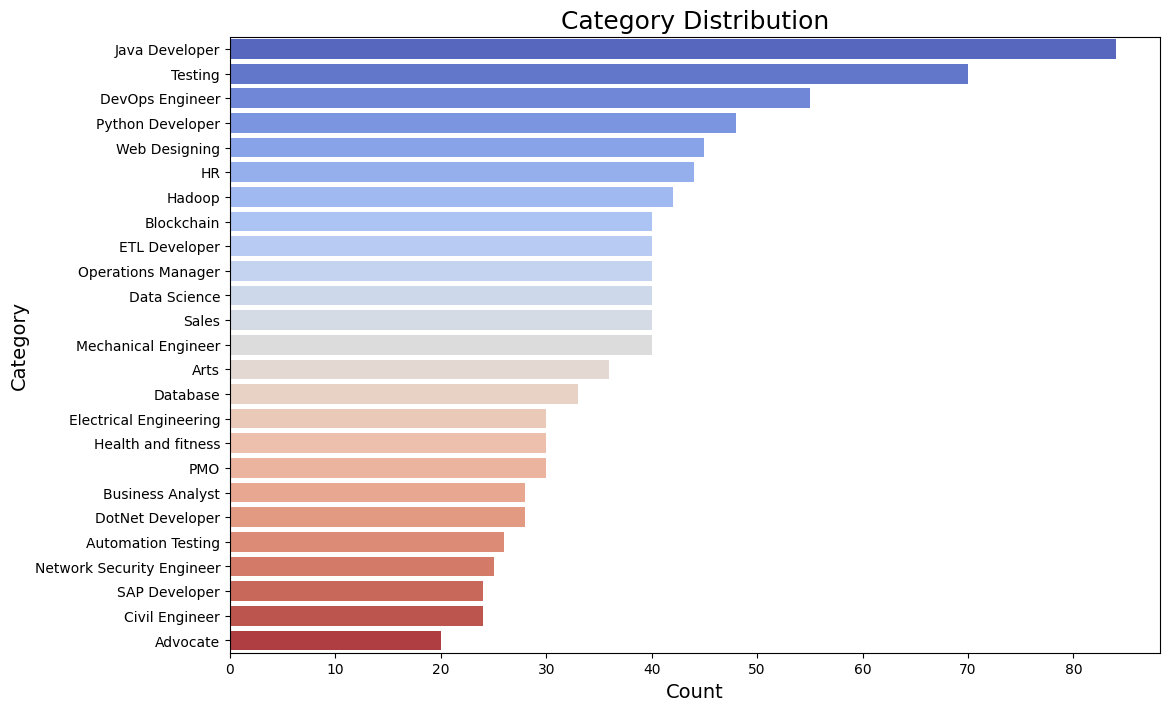

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of each category
count = data['Category'].value_counts()

# Create a bar chart of the category counts
plt.figure(figsize=(12,8))
sns.barplot(x=count.values, y=count.index, palette='coolwarm')

# Set the chart title and labels
plt.title('Category Distribution', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.show()


# Text cleaning

In [5]:
import re

def clean_text(text):
    patterns = [
        r'http\S+\s*',
        r'RT|cc',
        r'#\S+',
        r'@\S+',
        r'[^\w\s]',
        r'[^\x00-\x7f]'
    ]
    for pattern in patterns:
        text = re.sub(pattern, ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.strip()

data['clean_text'] = data['Resume'].apply(clean_text)


In [6]:
data['clean_text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to a ept the challenges Positive t...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean_text, Length: 962, dtype: object

# Word Cloud

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


[('details', 618), ('exprience', 580), ('company', 538), ('description', 530), ('months', 496), ('project', 493), ('data', 450), ('1', 384), ('year', 294), ('application', 266), ('january', 253), ('web', 249), ('maharashtra', 244), ('skill', 230), ('less', 227), ('6', 225), ('science', 211), ('learning', 210), ('software', 205), ('used', 193), ('development', 191), ('team', 189), ('engineering', 189), ('college', 186), ('machine', 183), ('education', 181), ('university', 181), ('developed', 179), ('time', 177), ('python', 176), ('bootstrap', 166), ('skills', 163), ('technologies', 162), ('pune', 154), ('jquery', 151), ('responsibility', 148), ('management', 147), ('sql', 144), ('arts', 144), ('database', 141), ('projects', 141), ('technical', 139), ('like', 139), ('nagpur', 138), ('website', 138), ('c', 137), ('roles', 136), ('monthscompany', 134), ('india', 134), ('b', 132), ('design', 128), ('based', 124), ('designed', 124), ('mumbai', 124), ('systems', 123), ('2', 123), ('system', 1

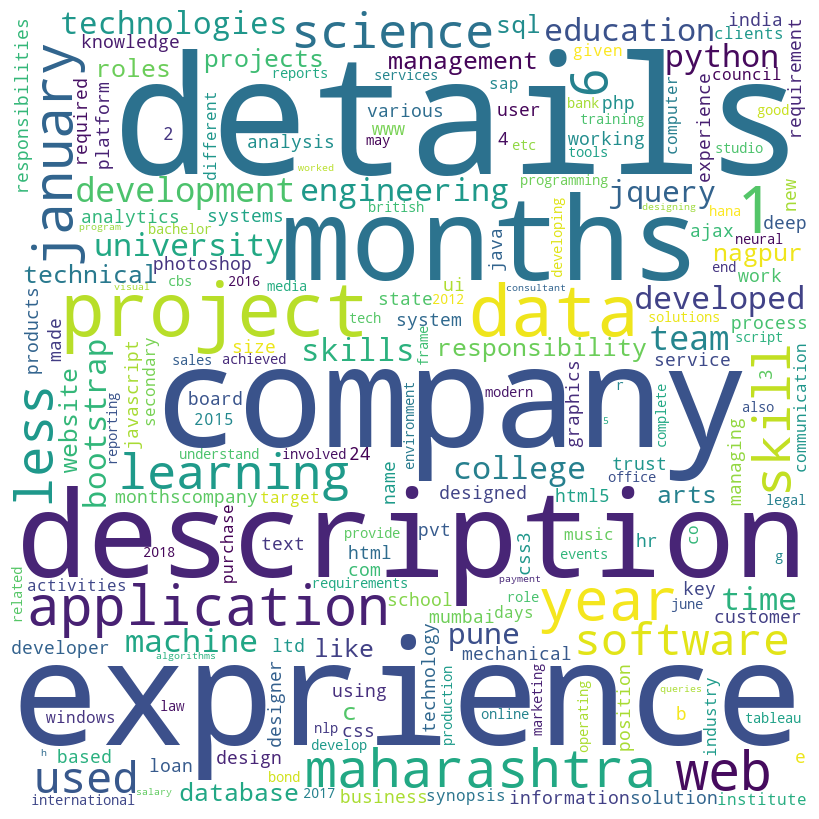

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english') + ['``', "''"])
punctuations = set(string.punctuation)

all_words = []
clean_sentences = ""

for sentence in data['Resume'].values[:200]:
    cleaned = clean_text(sentence)
    clean_sentences += cleaned
    words = word_tokenize(cleaned.lower())
    for word in words:
        if word not in stop_words and word not in punctuations:
            all_words.append(word)

word_freq = Counter(all_words)
most_common = word_freq.most_common(100)

print(most_common)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_frequencies(word_freq)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


# Training 

In [8]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])

In [9]:
data

,Category,Resume,clean_text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive t...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pickle
text=data['clean_text'].values
terget=data['Category'].values

vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000)

vect.fit(text)

Word_feature=vect.transform(text)

#pickle.dump(vect, open("trained_vectorizer.pkl", "wb"))

In [11]:
Word_feature

<962x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 123316 stored elements in Compressed Sparse Row format>

In [12]:
x_train, x_test, y_train, y_test=train_test_split(Word_feature, terget, random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(769, 2000)
(193, 2000)


In [13]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
# Apply SMOTE to handle class imbalance in the training data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [14]:
import sklearn
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier

model=OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train_res, y_train_res)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [15]:
prediction=model.predict(x_test)

In [16]:
print("training Score: {:.2f}".format(model.score(x_train_res, y_train_res)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))

training Score: 1.00
test Score: 0.99


In [17]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (model, metrics.classification_report(y_test, prediction)))

model report: OneVsRestClassifier(estimator=KNeighborsClassifier()): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       0.90      1.00      0.95         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
clf1 = OneVsRestClassifier(MultinomialNB()).fit(x_train_res, y_train_res)
prediction_mnb = clf1.predict(x_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf1.score(x_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf1.score(x_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.99


In [19]:
from sklearn import svm
clf2=OneVsRestClassifier(svm.SVC()).fit(x_train,y_train)
prediction_svm=clf2.predict(x_test)
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(clf1.score(x_train, y_train)))
print('Accuracy of sVM Classifier on test set: {:.2f}'.format(clf1.score(x_test, y_test)))

Accuracy of SVM Classifier on training set: 0.99
Accuracy of sVM Classifier on test set: 0.99


In [20]:
#import pickle 
#pickle.dump(model, open("Resume_Classifier1.pkl", "wb"))

In [21]:
sample_resume = "Python"
sample_resume_vec = vect.transform([sample_resume])
predicted_category = clf2.predict(sample_resume_vec)

print('Predicted category:', predicted_category[0])

Predicted category: 20


In [22]:
print(sample_resume_vec)

  (0, 1448)	1.0


In [23]:
import PyPDF2
import nltk
import re

nltk.download('punkt')

# Load the PDF file
with open('Resume1.pdf', 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    resume_text = ''
    for page in pdf_reader.pages:
        resume_text += page.extract_text()

# Clean the text
resume_text = resume_text.replace('\n', ' ')
resume_text = resume_text.replace('\t', ' ')
#print(resume_text)

# Extract the objective summary
sentences = nltk.sent_tokenize(resume_text)
pattern = re.compile(r'(objective|summary)?\s*(.*)', re.IGNORECASE)

objective_summary = None
for sentence in sentences:
    match = pattern.match(sentence)
    if match:
        objective_summary = match.group(2)
        break
#print(objective_summary)
# Save the objective summary

    
# Save the objective summary as a string
if objective_summary is not None:
    objective_summary_string = str(objective_summary)
    print('Objective summary extracted:', objective_summary_string)
else:
    print('Objective summary not found in resume')
    

import spacy


nlp = spacy.load('en_core_web_sm')

doc = nlp(resume_text)
skills = ['python', 'data analysis', 'project management', 'java', 'matlab', 'simulink']

key_skills = []

for token in doc:
    if token.text.lower() in [s.lower() for s in skills]:
        if token.text.lower() not in [ks.lower() for ks in key_skills]:
            key_skills.append(token.text)

print(key_skills)
key_skills_str = ' '.join(key_skills)

print(key_skills_str)

final=objective_summary_string+" "+key_skills_str
print(final)

import re

# Replace any non-alphanumeric character (except spaces) and periods with a space
final = re.sub(r'[^\w\s]|\.','', final)

# Replace any sequence of whitespace characters with a single space
final = re.sub(r'\s+', ' ', final)

# Convert the text to lowercase
final = final.lower()

# Remove any leading or trailing whitespace
final = final.strip()



[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


Objective summary extracted: Data Scientist ROBERT SMITHPhone: (123) 456 78 99  Email: info@qwikresume.com Website: www.qwikresume.com LinkedIn: linkedin.com/qwikresume Address: 1737 Marshville Road, Alabama.
['Python', 'MATLAB']
Python MATLAB
Data Scientist ROBERT SMITHPhone: (123) 456 78 99  Email: info@qwikresume.com Website: www.qwikresume.com LinkedIn: linkedin.com/qwikresume Address: 1737 Marshville Road, Alabama. Python MATLAB
